# Contando Palavras
Neste capítulo iremos começar a interagir com os textos no nível da linguagem, por meio das ferramentas do Processamento de Linguagem Natural (PLN). Vamos progredir gradualmente nossa representação da linguagem a partir da morfologia, passando pela sintaxe e chegando à semântica. 

Nesta etapa, faremos uso de biliotecas especializadas em PLN como o [NLTK](https://www.nltk.org/) e a [Spacy](https://spacy.io/). 

In [1]:
import nltk
import spacy
from collections import Counter
import pandas as pd
%pylab inline

2022-10-19 14:19:54.541080: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-10-19 14:19:54.541283: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-10-19 14:19:54.541374: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2022-10-19 14:19:54.541477: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2022-10-19 14:19:54.541559: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Populating the interactive namespace from numpy and matplotlib


Bibliotecas de PLN requerem o carregamento de modelos de liguagem para funcionar de maneira apropriada: para este capitulo iremos carregar os modelos específicos da lingua portuguesa. Para isso precisamos executar comandos no terminal do sistema operacional:

In [5]:
!python3 -m spacy download pt_core_news_sm

2022-10-19 14:19:34.420030: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-10-19 14:19:34.420158: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-10-19 14:19:34.420237: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2022-10-19 14:19:34.420314: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2022-10-19 14:19:34.420390: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Para contar as palavras de um texto, é preciso primeiro separá-las uma a uma. A este processo dá-se o nome de tokenização, e é típicamente fácil de fazer mal-feito e difícil de fazer bem-feito.

Primeiramente precisaremos carregar os verbetes com a função que criamos no capítulo 1.

In [2]:
import glob, os
caminho = "../dhbb/text/*.text"
arquivos  = glob.glob(caminho)

def tabula_verbete(n=None):
    """
    Carrega todos os verbetes disponíveis, ou os primeiros n.
    n:  número de verbetes a tabular
    """
    if n is None:
        n = len(arquivos)
    linhas = []
    for a in arquivos[:n]:
        with open (a, 'r', encoding='utf8') as f:
            verbete = f.read()
        cabeçalho = verbete.split('---')[1]
        campos = {l.split(':')[0].strip() :l.split(':')[1].strip() for l in cabeçalho.split('\n')[:4] if l}
        campos['arquivo'] = os.path.split(a)[1]
        campos['cargos'] = pd.np.nan if 'cargos:' not in cabeçalho else cabeçalho.split('cargos:')[1]
        campos['corpo'] = verbete.split('---')[2]
        linhas.append(campos)
    tabela = pd.DataFrame(data = linhas, columns=['arquivo','title', 'natureza', 'sexo', 'cargos', 'corpo'])
    return tabela

## Tokenização com o nltk

In [9]:
tabela = tabula_verbete()

In [12]:
eng = create_engine("sqlite:///minha_tabela.sqlite")
#dhbb = pd.read_sql_table('resultados')
biograficos = pd.read_sql_query('select * from resultados where natureza="biográfico"', con=eng)
biograficos.head()

index    arquivo                   title    natureza sexo  \
0      0     1.text         COELHO, Machado  biográfico    m   
1      1    10.text         ABÍLIO, Armando  biográfico    m   
2      2   100.text           ALEIXO, Pedro  biográfico    m   
3      3  1000.text         CAMPOS, Eduardo  biográfico    m   
4      4  1001.text  CAMPOS, Eleazar Soares  biográfico    m   

                                              cargos  \
0                           \n - dep. fed. RJ 1960\n   
1   \n - dep. fed. RS 2001-2002\n - dep. fed. RS ...   
2   \n - jornalista\n - dep. fed. SC 1951-1956\n ...   
3                          \n - gov. AL 1978-1979 \n   
4   \n - jornalista\n - reitor UDF 1937-1938\naut...   

                                               corpo  
0  \n\n«Gabriel Lopes Ferraz» nasceu no Rio de Ja...  
1  \n\n«Orlando Desconsi» nasceu em Horizontina (...  
2  \n\n«Jorge Lacerda» nasceu em Paranaguá (PR) n...  
3  \n\n«Geraldo Medeiros de Melo» nasceu em Capel...  
4  \n\n«Alceu Amoroso Lima», também conhecido pel...

## Tokenização com o NLTK

In [8]:
palavras = nltk.word_tokenize(biograficos.corpo[0])
palavras[:10]

['«',
 'José',
 'Machado',
 'Coelho',
 'de',
 'Castro',
 '»',
 'nasceu',
 'em',
 'Lorena']

Uma vez "tokenizado" o texto podemos contar as palavras muito simplesmente usando a função `Counter`do Python

In [28]:
c = Counter(palavras)
c.most_common(n=10)

[('de', 22),
 (',', 20),
 ('em', 16),
 ('.', 14),
 ('a', 10),
 ('no', 8),
 ('e', 7),
 ('da', 6),
 ('(', 5),
 (')', 5)]

Outra maneira de fazer isso seria usando o NLTK. Com a vantagem de ainda podermos visualizar graficamente.

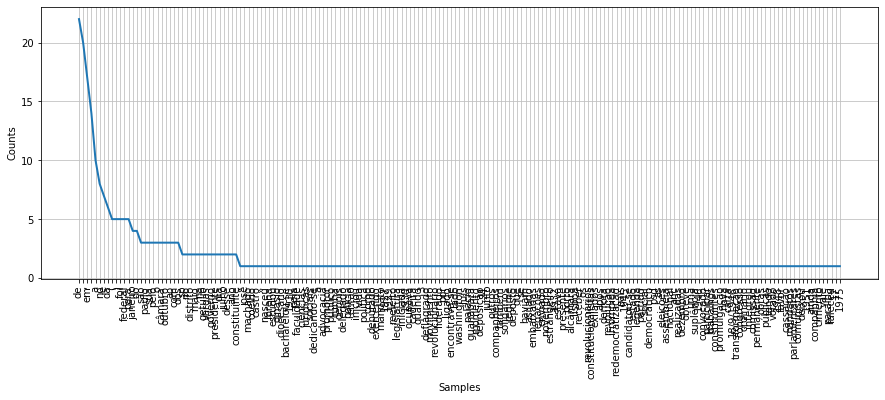

In [17]:
figure(figsize=(15,5))
fd = nltk.FreqDist([p.lower() for p in palavras])
fd.plot();

In [22]:
print("Numero de tokens:", len(palavras))
print("Tamanho do Vocabulário:", len(set([p.lower() for p in palavras])))

Numero de tokens: 341
Tamanho do Vocabulário: 185


Como vemos no exemplo acima, as palavras mais frequentes não muito informativas. Muitas vezes pode ser útil removê-las da análise. Linguistas costumams chamar este tipo de palavras de **stop-words**. Alem disso, vamos tambem remover as pontuaçoes. 

In [9]:
sw = nltk.corpus.stopwords.words('portuguese')
from string import punctuation
print(punctuation)
sw[:10]

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para']

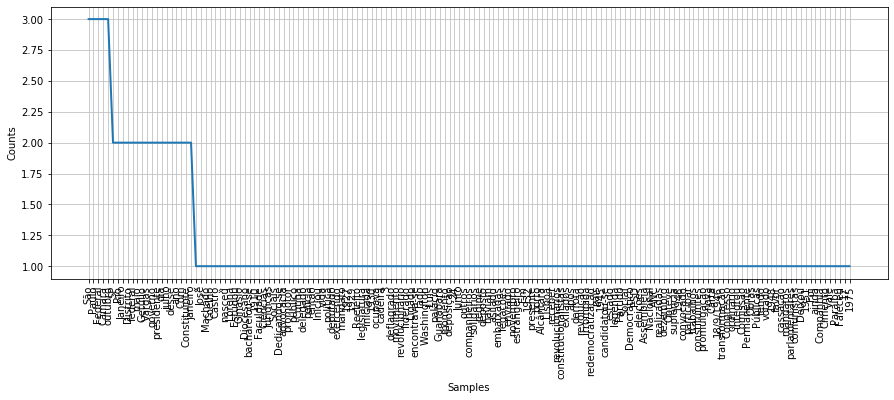

In [10]:
figure(figsize=(15,5))
fd = nltk.FreqDist([p for p in palavras if p not in sw+list(punctuation)])
fd.plot();

# Analizando coleções de textos
Acima analizamos o conteúdo de apenas um verbete, mas seria bem mais relevante podermos fazer a análise em uma coleção de verbetes. Para isso aprenderemos a criar um objeto `TextCollection` que como o nome diz, representa uma coleção de texto, mas que nos permite a realização de análises a nível de coleção.

In [4]:
tc = nltk.TextCollection([nltk.word_tokenize(c) for c in biograficos.corpo])

In [5]:
nltk.FreqDist(tc)

FreqDist({',': 587463, 'de': 517135, '.': 259249, 'do': 226381, 'a': 214979, 'e': 192479, 'da': 181854, 'em': 153158, 'o': 148578, ')': 87927, ...})

In [6]:
tc.concordance('filho', width=150)

Displaying 25 of 10181 matches:
io Vieira » nasceu em Itaporanga ( PB ) no dia 29 de dezembro de 1944 , filho de Argemiro Abílio de Sousa e de Luísa Bronzeado Vieira . Em 1962 ingre
arlos Zoghbi , foi acusado de emprestar um apartamento funcional para o filho e de abrir empresas em nome de uma ex-babá de 83 anos , para intermedia
 de 2009 , a « Folha de S. Paulo » denunciou que Luís Fernando Zoghbi , filho de João Carlos Zoghbi , teve passagens emitidas para Madri , em 2008 , 
distrito do município de Mariana ( MG ) , no dia 1º de agosto de 1901 , filho do comerciante José Caetano Aleixo e de Úrsula Martins Aleixo . Fez seu
ipação dos generais Humberto de Alencar Castelo Branco , Olímpio Mourão Filho e Osvaldo Cordeiro de Farias e dos líderes udenistas Pedro Aleixo - que
rique Accioly Campos » nasceu em Recife , no dia 10 de agosto de 1965 , filho de Maximiano Accioly Campos e de Ana Lúcia Arraes de Alencar . Seu avô 
 % dos votos , contra os 34,64 % obtidos pelo então governador Mendo

In [18]:
linhas = tc.concordance_list('filho',width=150)
linhas[0]

ConcordanceLine(left=['Cimento', 'Vale', 'do', 'Paraíba', '.', 'Faleceu', 'no', 'Rio', 'de', 'Janeiro', 'no', 'dia', '17', 'de', 'maio', 'de', '1975', '.', '«', 'Armando', 'Abílio', 'Vieira', '»', 'nasceu', 'em', 'Itaporanga', '(', 'PB', ')', 'no', 'dia', '29', 'de', 'dezembro', 'de', '1944', ','], query='filho', right=['de', 'Argemiro', 'Abílio', 'de', 'Sousa', 'e', 'de', 'Luísa', 'Bronzeado', 'Vieira', '.', 'Em', '1962', 'ingressou', ',', 'em', 'Recife', ',', 'na', 'Faculdade', 'de', 'Ciências', 'Médicas', 'da', 'Universidade', 'Federal', 'de', 'Pernambuco', ',', 'pela', 'qual', 'se', 'graduou', 'em', '1968', '.'], offset=360, left_print='io Vieira » nasceu em Itaporanga ( PB ) no dia 29 de dezembro de 1944 ,', right_print='de Argemiro Abílio de Sousa e de Luísa Bronzeado Vieira . Em 1962 ingre', line='io Vieira » nasceu em Itaporanga ( PB ) no dia 29 de dezembro de 1944 , filho de Argemiro Abílio de Sousa e de Luísa Bronzeado Vieira . Em 1962 ingre')

In [19]:
print(*linhas[0].right)

de Argemiro Abílio de Sousa e de Luísa Bronzeado Vieira . Em 1962 ingressou , em Recife , na Faculdade de Ciências Médicas da Universidade Federal de Pernambuco , pela qual se graduou em 1968 .


## Exercício
Utilizando a ferramenta de concordance, procure extrair a filiação dos verbetados, escrevendo uma função que percorra todas as ocorrências da palavra "filho", separando aquelas com sentido de indicação de filiação.

In [17]:
def parse_progenitores(linha):
    '''
    A partir de uma linha do DHBB contendo nomes de pai e mãe, extrai os nomes e os retorna
    '''
    right = linha.right[1:]
    try:
        pos_virg = right.index(',')
    except ValueError:
        pos_virg = 100
    try:
        pos_pt = right.index('.')
    except ValueError:
        pos_pt = 100
    fim = min(pos_virg, pos_pt)
    pais = right[:fim]
    if 'e' in pais:
        pai = " ".join(pais[:pais.index('e')])
        mae = " ".join([p for p in pais[pais.index('e'):] if p not in [',', 'de', 'e']])
    else:
        pai = " ".join(pais)
        mae = "desconhecida."
    return pai, mae

def encontra_pais(tc):
    linhas = tc.concordance_list('filho',width=180, lines=50000) + tc.concordance_list('filha',width=180, lines=50000)
    print("Processando {} linhas".format(len(linhas)))
    i = 0
    for linha in linhas:
        if linha.right[0] not in ['de', 'da', 'do']:
            continue
        pai, mae = parse_progenitores(linha)
        i += 1
        print("Pai:",pai, '\n', "Mãe:", mae)
    print("Encontramos progenitores em {} linhas".format(i))
encontra_pais(tc)

Processando 11028 linhas
Pai: Argemiro Abílio de Sousa 
 Mãe: Luísa Bronzeado Vieira
Pai: João Carlos Zoghbi 
 Mãe: desconhecida.
Pai: comerciante José Caetano Aleixo 
 Mãe: Úrsula Martins Aleixo
Pai: Maximiano Accioly Campos 
 Mãe: Ana Lúcia Arraes Alencar
Pai: Francisco Gonçalves Campos 
 Mãe: Adelina Gonçalves Campos
Pai: comerciante José Justino Campos 
 Mãe: Noemi França Campos
Pai: Antônio Machado de Campos 
 Mãe: Ana Cândida da Silva
Pai: magistrado Jacinto Álvares da Silva Campos 
 Mãe: Azejúlia Sousa Silva
Pai: Manuel Soares Campos 
 Mãe: Irene Gomes Campos
Pai: Manuel Campos 
 Mãe: Alaíde Dantas Campos
Pai: Albino da Silva Campos 
 Mãe: Adalgisa da Costa Campos
Pai: Júlio Domingos Campos 
 Mãe: desconhecida.
Pai: José Dias Pinto Aleixo 
 Mãe: Esaltina Maria Paiva Aleixo
Pai: Júlio Domingos Campos 
 Mãe: desconhecida.
Pai: João Ferraz de Campos 
 Mãe: Edi Pereira Ferraz Campos
Pai: José Wilson Siqueira Campos 
 Mãe: Aureni Siqueira Campos
Pai: Júlio Domingos de Campos 
 Mãe: A

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




 Mãe: desconhecida.
Pai: Adelino Ribeiro Gonçalves 
 Mãe: Nair Maria Chaves Gonçalves
Pai: Nilton Gonçalves 
 Mãe: Maria Yvone Borges Gonçalves
Pai: Adão Alexandre de Gouvêa 
 Mãe: Eva Cezar Gouvêa
Pai: Otacílio Nascimento 
 Mãe: Aldaiza Gouveia Franco Nascimento
Pai: Francisco Fernandes Carneiro 
 Mãe: Maria Josefina Sousa Carneiro
Pai: José Francisco dos Santos 
 Mãe: Terezinha dos Santos
Pai: Werner Grau 
 Mãe: Dalva Couto Grau
Pai: Francisco Graziano Filho 
 Mãe: Inês Teresinha Batistela Graziano
Pai: Eurico Dacheux de Macedo 
 Mãe: Therezinha Greca Macedo
Pai: Henrique Gregori Filho 
 Mãe: Ester Paraventi Gregori
Pai: José Grings 
 Mãe: Maria Margarida Büttenbender Grings
Pai: César Allegretti 
 Mãe: Artemísia Sgarbi Allegretti
Pai: Otávio Barbosa Carneiro 
 Mãe: Aurora Lobo Carneiro
Pai: Newton Lopes 
 Mãe: Hydee Gripp Lopes
Pai: José Guerra Pinto Coelho 
 Mãe: Emília Bernardes Guerra Pinto Coelho
Pai: José Maria dos Mares Guia 
 Mãe: Judith Pinto Coelho dos Mares Guia
Pai: Marc

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 
 Mãe: Porcina Rodrigues Morais Sá
Pai: José Nilson de Sá 
 Mãe: Maria Helena Gurgel Sá
Pai: José de Oliveira 
 Mãe: Esolina Nóbrega Oliveira
Pai: Geraldo Virgínio dos Santos 
 Mãe: Maria Lourdes Pedreira dos Santos
Pai: Masaji Taniguchi 
 Mãe: Masako Taniguchi
Pai: José Custódio Cesilio 
 Mãe: Maria Fuscaldi Cesilio
Pai: Jácomo Tatto 
 Mãe: Inês Fontana Tatto
Pai: Manoel Tavares 
 Mãe: Maria Rodrigues Tavares
Pai: Joaquim Ricardo Teixeira 
 Mãe: Izabel Lourdes Scalize Teixeira
Pai: Wolgran Junqueira Ferreira 
 Mãe: Maria Lourdes Teixeira Ferreira
Pai: João de Matos Carvalho 
 Mãe: Rosa Andrade Carvalho
Pai: João Darcy Teixeira 
 Mãe: Juraci Guterres Teixeira
Pai: José Temporão 
 Mãe: Sara Gomes
Pai: Manuel Tenório Cavalcanti 
 Mãe: Maria José Cerqueira Cavalcanti
Pai: José Tenório de Albuquerque Lins 
 Mãe: Maria Teresa Melo Tenório
Pai: Walter Paim Terra 
 Mãe: Nelly Lúcia Gasparini Terra
Pai: José Moacir Teófilo 
 Mãe: Maria Teresa Auto Teófilo
Pai: José Tiscoski 
 Mãe: Celina da C

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




 Mãe: Zulmira dos Santos Cerdeira
Pai: João M. Cerqueira 
 Mãe: Maria S. Cerqueira
Pai: Abraão Elias 
 Mãe: Abce João Jorge
Pai: Manuel Joaquim de Almeida 
 Mãe: Noêmia Melo Almeida
Pai: conselheiro Francisco Januário da Gama Cerqueira 
 Mãe: desconhecida.
Pai: Vilmar Ferreira Cerqueira 
 Mãe: Marília Moura Diniz Cerqueira
Pai: Nélson de Albuquerque Cerqueira 
 Mãe: Elita Albuquerque Cerqueira
Pai: Modesto José de Cerqueira 
 Mãe: Durvalina Ferreira da Silva
Pai: José Cersósimo 
 Mãe: Nair Ragazzi Cersósimo
Pai: diplomata Jacome Baggi de Berenguer Cesar 
 Mãe: Beatriz Pacheco Berenguer Cesar
Pai: Sancho de Bittencourt Berenguer Cesar 
 Mãe: Matilde Baggi Berenguer Cesar
Pai: Rogério de Almeida César Júnior 
 Mãe: Amélia Vieira da Silva César
Pai: Georgiano Fernandes Lima 
 Mãe: Maria Lourdes Carvalho Lima
Pai: Abelardo Cerqueira César 
 Mãe: desconhecida.
Pai: Otávio Cesário Pereira 
 Mãe: Maria Sousa Pereira
Pai: Egberto Frota Carneiro 
 Mãe: Alba Chagas Carneiro
Pai: servidor da Jus

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 empresário Joaquim Teixeira Dias 
 Mãe: Maria da Conceição Pimentel Dias
Pai: Silvino Fernandes Dias 
 Mãe: Helena Fregadolli Dias
Pai: Lúcio Annes Dias 
 Mãe: Balbina Lopes Dias
Pai: fazendeiro 
 Mãe: político Gentil Dias Quadros Emerenciana Soares Dias
Pai: Benjamim Dias 
 Mãe: Alice Magalhães Dias
Pai: Basílio Dias da Silva 
 Mãe: Laurinda Cândida Sousa
Pai: Antônio Augusto Dias 
 Mãe: Elza Gieseler Cioffi Dias
Pai: Zaluar Dias 
 Mãe: Deocelina Dias
Pai: José Dias Alves 
 Mãe: Amélia Duarte Alves
Pai: Moacir MacDonough Dias 
 Mãe: Alcida Pereira Dias
Pai: Garibaldi Alves 
 Mãe: Maria Vanice Chaves Alves
Pai: Sebastião Dias Pereira 
 Mãe: Alzira Lima Dias Pereira
Pai: Juvêncio de Figueiredo Dias 
 Mãe: Maria Dorila Vergolino Dias
Pai: Virgínio Dias 
 Mãe: Zilá Cândida Dias
Pai: Vilmar Dias 
 Mãe: Alcione Oliveira Dias
Pai: Silvino Fernandes Dias 
 Mãe: Helena Fregadolli Dias
Pai: Manuel Firmo Ribeiro 
 Mãe: Arlinda Dias Ribeiro
Pai: Manuel Dias 
 Mãe: Alda Lemos Dias
Pai: arquiteto 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Júlia Freire da Fonseca
Pai: Claudino César Freire 
 Mãe: desconhecida.
Pai: almirante George Americano Freire 
 Mãe: Doralisa Botafogo Freire
Pai: Alberto K. Amaral 
 Mãe: Ana Fortes Amaral
Pai: Jessé Pinto Freire 
 Mãe: Ivanise Câmara Freire
Pai: Manuel Eugênio do Nascimento 
 Mãe: desconhecida.
Pai: funcionário público Casimiro Antônio da Silva 
 Mãe: Maria Freire da Silva
Pai: Alfredo Freire 
 Mãe: Francisca Melo Freire
Pai: Ciro Freire de Medeiros 
 Mãe: Maria Guilhermina da Silva Freire
Pai: Nélson Geraldo Freire 
 Mãe: desconhecida.
Pai: Jessé Pinto Freire 
 Mãe: Ivanise Câmara Freire
Pai: Jaime Sampaio Freire 
 Mãe: Crisantema Lins Freire
Pai: Diolindo dos Santos Freire 
 Mãe: Maria Almeida Freire
Pai: Manuel de Jesus Amaral 
 Mãe: Rosa Serafina Del Bosco Amaral
Pai: Marcos de Barros Freire 
 Mãe: Maria Carolina Vasconcelos Freire
Pai: Vitorino de Brito Freire 
 Mãe: desconhecida.
Pai: Landelino de Luna Freire 
 Mãe: Ana Maria Marcico Freire
Pai: Luís de Barros Freire 
 Mãe: d

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Pai: João Guilherme Paz Herrmann 
 Mãe: América Elias Herrmann
Pai: Gabriel Jorge Hermes 
 Mãe: Leonor Granhen Hermes
Pai: Antônio Joaquim de Moura Andrade 
 Mãe: Guiomar Soares Moura Andrade
Pai: Mário Assis da Fonseca Hermes 
 Mãe: Zaira Jorge da Fonseca Hermes
Pai: José Braga Couto 
 Mãe: Aimée Cançado Couto
Pai: Cristiano Emanuel Heuser 
 Mãe: Ida Heuser
Pai: ferroviário Norberto Seara Heusi 
 Mãe: Hilda Nascimento Heusi
Pai: comerciante João José Hingel 
 Mãe: da dona-de-casa Alda dos Santos Avelar Hingel
Pai: Joiti Hirata 
 Mãe: Yuki Hirata
Pai: Henrique Luís Hoffmann 
 Mãe: Maria Madalena Hoffmann
Pai: Otacílio Holanda de Andrade 
 Mãe: Alice Costa Andrade
Pai: Francisco Holanda Oliveira 
 Mãe: Raimunda Chagas Holanda
Pai: Gilberto Andrade 
 Mãe: Virgínia Auto Andrade
Pai: Linésio de Holanda Cavalcanti 
 Mãe: Honorina Holanda Braga
Pai: Cícero Franklin Cordeiro 
 Mãe: Noêmia Holanda Cordeiro
Pai: Henrique Holl 
 Mãe: Júlia Holl
Pai: Francisco Inácio Dias 
 Mãe: Julita Guaraciab

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Mãe: Francisca Teodora Nabuco Melo
Pai: Jorge Nacle 
 Mãe: Adla Nacle
Pai: Moisés Salim Nadaf 
 Mãe: Escolástica Rodrigues Nadaf
Pai: Félix Simão Nader 
 Mãe: Brígida Simão Nader
Pai: Osrraia Pedro Nader 
 Mãe: Iracema Leite Nader
Pai: joalheiro Isaac Nahon 
 Mãe: Maria Bentolila Nahon
Pai: Artur Napoleão do Rego 
 Mãe: Olímpia Martins do Rego
Pai: Aluísio Napoleão de Freitas Rego 
 Mãe: desconhecida.
Pai: Onécimo Ribeiro Nardes 
 Mãe: Cleni Maria Ribeiro Nardes
Pai: Vicente Ferreira de Arruda Coelho 
 Mãe: Iná Oliveira Arruda Coelho
Pai: José Ferreira do Nascimento 
 Mãe: Georgina Ferreira do Nascimento
Pai: Antônio Alves Nascimento 
 Mãe: Janira Sá Nascimento
Pai: Elias Júlio Correia 
 Mãe: Maria Correia da Silva
Pai: Rafael Arcanjo do Nascimento 
 Mãe: desconhecida.
Pai: Pedro Mendonça da Silva 
 Mãe: Maria Doralice Nascimento da Silva
Pai: Eduardo Pereira do Nascimento 
 Mãe: Aclimea Oliveira Nascimento
Pai: Olívio Nascimento 
 Mãe: Leontina Ferreira
Pai: Jaime Naslausky 
 Mãe: Da

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Pai: desembargador Armando Azambuja 
 Mãe: desconhecida.
Pai: Pedro Felismino Pereira 
 Mãe: desconhecida.
Pai: Francisco Clementino Pereira 
 Mãe: Isabel Brito Pereira
Pai: Antônio da Silva Pereira 
 Mãe: Maria Luísa Canavarro Pereira
Pai: José da Costa Pereira 
 Mãe: Placidina Carolina Amélia
Pai: Marcolino Pereira Lima 
 Mãe: desconhecida.
Pai: Henrique Alves Pereira 
 Mãe: Josélia Filgueiras Alves Pereira
Pai: Pedro Laurentino de Sousa 
 Mãe: Ângela Sousa Reis
Pai: Gervásio Alves Pereira 
 Mãe: Maria Cecília Tavares Pereira
Pai: Sílvio de Lima Gonçalves Pereira 
 Mãe: Clara Bresser Gonçalves Pereira
Pai: Manuel Pereira da Silva 
 Mãe: Amélia Pereira da Silva
Pai: Dario Cavalcanti de Azambuja 
 Mãe: Dirce Castrioto Azambuja
Pai: José Luís Pereira 
 Mãe: Vera Meyer Pereira
Pai: Antônio César Rodrigues Pereira 
 Mãe: Leonor Cardoso Rodrigues Pereira
Pai: Álvaro Alves Pereira 
 Mãe: Francisca Alves Pereira
Pai: Manuel Gomes de Oliveira 
 Mãe: Júlia Pereira Oliveira
Pai: Aproniano Pere

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 
 Mãe: Julieta Figueiredo Ribeiro
Pai: Nélson Pantoja Ribeiro 
 Mãe: Nair Lopes Ribeiro
Pai: Fernando Nina Ribeiro 
 Mãe: Maria da Glória Mallet Souza Aguiar Nina Ribeiro
Pai: Celso Leite Ribeiro 
 Mãe: Maria Leite Ribeiro
Pai: Orlando Leite Ribeiro 
 Mãe: Vera Belford Roxo Leite Ribeiro
Pai: João Úrsulo Ribeiro Coutinho 
 Mãe: Helena Pessoa Ribeiro Coutinho
Pai: Jean Cristiano Indella Ribeiro 
 Mãe: Alice Ribeiro
Pai: Nelo Egídio Balestra 
 Mãe: Garcita Soyer Balestra
Pai: Assad Khalil Richa 
 Mãe: Joana Miguel Richa
Pai: Jean-Bertrand Richer 
 Mãe: Severiana Lacerda Richer
Pai: João Ricupero 
 Mãe: Assunta J. Ricupero
Pai: Frederico Riffel 
 Mãe: Elenore Riffel
Pai: Giuseppe Cuoghi 
 Mãe: Valentina Zobole Cuoghi
Pai: Germano João Rigotto 
 Mãe: Julieta Diniz Vargas Rigotto
Pai: João Horácio da Silva Paranhos 
 Mãe: Petronilha Peña Paranhos
Pai: Carlos Lutgardes da Silva Rios 
 Mãe: Alba Falcão Rios
Pai: Antonio Balhmann Cardoso Nunes 
 Mãe: Francisca Matos Nunes
Pai: Newton Vieira R

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Roberto Silveira 
 Mãe: desconhecida.
Pai: Darci Borges da Silveira 
 Mãe: Maria Helena Kaseker da Silveira
Pai: Osmar Javari Barém 
 Mãe: Teresa Jovê Barém
Pai: comerciante Bruno Veloso da Silveira 
 Mãe: Joana Dália da Silveira
Pai: capitão Zeferino Carlos da Silveira 
 Mãe: Ana Sousa Silveira
Pai: negociante 
 Mãe: industrial Manuel Guilherme da Silveira
Pai: Rômulo Prates da Silveira 
 Mãe: Cândida Célia Prates da Silveira
Pai: Vicente Silveira 
 Mãe: Lídia Sanseverino Silveira
Pai: comerciante Ismael Silveira 
 Mãe: Jovita Ribeiro Silveira
Pai: Emílio Soares da Silveira 
 Mãe: Isaura Magalhães da Silveira
Pai: Boanerges Borges da Silveira 
 Mãe: Maria do Carmo Teixeira da Silveira
Pai: Leandro Lobão da Silveira 
 Mãe: Antônia Rodrigues da Silveira
Pai: Moacir Iguatemi da Silveira 
 Mãe: Delcides Clímaco da Silveira
Pai: Alfredo Lopes Barreira 
 Mãe: Antônia Uchôa Barreira
Pai: José Luís da Silveira 
 Mãe: Henriqueta Magalhães da Silveira
Pai: Joaquim Modesto da Silveira 
 Mãe: Elv

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 José Barbosa Ferreira Vidigal 
 Mãe: Maria Nazaré Amorim Ferreira Vidigal
Pai: Manuel de Morais Barros 
 Mãe: Maria Inês Morais Barros
Pai: Afrodísio Vidigal 
 Mãe: Luísa Benvinda da Costa Vidigal
Pai: industrial Luís Eulálio de Bueno Vidigal 
 Mãe: Maria Adília Barbosa Vidigal
Pai: comerciante Feliciano Duarte Vidigal 
 Mãe: Augusta Maciel Vidigal
Pai: Antônio das Chagas Viegas 
 Mãe: Maria Cristina Viegas
Pai: Antônio Augusto Viegas 
 Mãe: Etelvina Barros Correia Viegas
Pai: João Paulino Vieira 
 Mãe: Alípia Maristany Vieira
Pai: Sebastião Navarro Vieira 
 Mãe: Alice Podestá Navarro Vieira
Pai: Joviniano Pereira de Morais 
 Mãe: Maria Vieira Camargo
Pai: Manuel de Morais Barros 
 Mãe: Maria Inês Morais Barros
Pai: Francisco Pereira Vieira 
 Mãe: Almira Alves Lima
Pai: Miguel José Vieira 
 Mãe: Virgínia da Luz Vieira
Pai: Bento Águido Vieira 
 Mãe: Celina Clara Doin Vieira
Pai: João Pedro Gouveia de Carvalho Vieira 
 Mãe: Cecília Almeida Silva Gouveia Vieira
Pai: Antônio Vieira 
 Mãe

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Pai: Antônio Saenz Surita 
 Mãe: Aurélia Saenz Surita
Pai: Artur Sampaio Carepa 
 Mãe: Maria José Vasconcelos Carepa
Pai: José da Costa Moelmann 
 Mãe: Ana Elisa Ribeiro Moelmann
Pai: Juscelino Kubitschek de Oliveira 
 Mãe: Sara Luísa Lemos Oliveira
Pai: almirante José Alves Barbosa 
 Mãe: desconhecida.
Pai: Osvaldo Aranha 
 Mãe: desconhecida.
Pai: proprietário 
 Mãe: diretor do Banco da Bahia
Pai: José Martins Rodrigues 
 Mãe: desconhecida.
Pai: Ataliba Pinheiro 
 Mãe: Eglantina Sales Pinheiro
Pai: José Rufino Bezerra Cavalcanti 
 Mãe: desconhecida.
Pai: um comerciante de Araxá ( MG ) 
 Mãe: desconhecida.
Pai: Fausto Antônio de Angelis 
 Mãe: Cléia Trindade Angelis
Pai: Valdemar Martins Ferreira 
 Mãe: desconhecida.
Pai: João Ferreira Lima 
 Mãe: desconhecida.
Pai: escritor Alberto de Faria 
 Mãe: desconhecida.
Pai: então major João Batista Pereira Souto 
 Mãe: desconhecida.
Pai: José Rui da Silveira Lino 
 Mãe: Ovília d ’ Alencar Lino
Pai: Marcos Konder 
 Mãe: desconhecida.
Pai: Aug

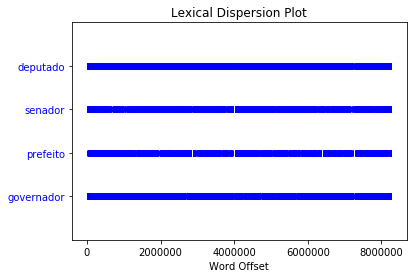

In [24]:
tc.dispersion_plot(['deputado', 'senador', 'prefeito', 'governador'])

# Separando frases
Além de quebrar os textos em seus tokens constituintes, podemos também dividi-los por frases, o que pode ser mais convenientes para certas análises. Para isso utilizamos a função `sent_tokenize` do nltk.

In [22]:
nltk.tokenize.sent_tokenize(biograficos.corpo[0])

['\n\n«José Machado Coelho de Castro» nasceu em Lorena (SP).',
 'Estudou no Ginásio Diocesano de São Paulo e bacharelou-se em 1910 pela\nFaculdade de Ciências Jurídicas e Sociais.',
 'Dedicando-se à advocacia, foi\npromotor público em Cunha (SP) e depois delegado de polícia no Rio de\nJaneiro, então Distrito Federal.',
 'Iniciou sua vida política como deputado federal pelo Distrito Federal,\nexercendo o mandato de 1927 a 1929.',
 'Reeleito para a legislatura iniciada\nem maio de 1930, ocupava sua cadeira na Câmara quando, em 3 de outubro,\nfoi deflagrado o movimento revolucionário liderado por Getúlio Vargas.',
 'Ligado ao governo federal, encontrava-se ao lado do presidente\nWashington Luís, no palácio Guanabara, no momento de sua deposição no\ndia 24 de outubro.',
 'Junto com outros companheiros também solidários ao\nregime deposto e que se haviam asilado em embaixadas e legações, foi\nenviado em novembro para o estrangeiro.',
 'Em outubro de 1932, estava\npresente no porto de Alcânt

# Busca textual
Realizar uma busca textual em uma coleção de textos é muito mais eficiente do que simplesmente realizar operações sobre coleções de strings. Neste capítulo iremos examinar como "indexar" o DHBB, usando um simples indexador/buscador chamado [whoosh](https://whoosh.readthedocs.io). 

In [4]:
from whoosh import index 
import os
from whoosh.fields import *
from IPython.core.display import display, HTML

In [5]:
schema = Schema(title=TEXT(stored=True), sexo=ID(stored=True), caminho=ID(stored=True), corpo=TEXT(stored=True))

In [6]:
if not os.path.exists('indexdir'):
    os.mkdir('indexdir')
    ix = index.create_in("indexdir", schema)
else:
    ix = index.open_dir('indexdir')

In [7]:
writer = ix.writer()

In [21]:
for v in tabela.itertuples():
    if pd.isnull(v.sexo):
        writer.add_document(title=v.title,sexo='na', caminho=v.arquivo,corpo=v.corpo)
    else:
        writer.add_document(title=v.title,sexo=v.sexo, caminho=v.arquivo,corpo=v.corpo)
writer.commit()

In [9]:
from whoosh.qparser import QueryParser
from whoosh import qparser

In [10]:
def busca(consulta):
    qp = QueryParser("corpo", ix.schema)
    qp.add_plugin(qparser.EveryPlugin())
    query = qp.parse(consulta)
    
    with ix.searcher() as searcher:
        results = [(dict(hit),hit.highlights("corpo")) for hit in searcher.search(query, limit=10)]
    return results
    

In [22]:
resultados = busca('assassin*')


In [23]:
print('Resultados:', len(resultados))
for res in resultados[:10]:
    print(res[0]['title'])
    display(HTML(res[1]))
   # encontra_pais(nltk.Text(nltk.tokenize.wordpunct_tokenize(res[0]['corpo'])))

Resultados: 10
PASCOAL, Hildebrando


RIPPOL, Valdemar


CUNHA, Francisco Flores da


MENDES, Chico


CUNHA NETO, Augusto


VAZ, Rubens


FURTADO, Heitor Alencar


VANNUCHI, Paulo


CUNHA, Ceci


BARROS, Manuel Gomes de
